# A* Algorithm

Importing libraries

In [1]:
import argparse
from random import randint
import matplotlib as mp
import matplotlib.pyplot as plt
import numpy as np
import math

## Node Class

Every node will have
- $g$ the cost from start node to reach current node
- $h$ the estimated cost to reach the destinaton from current node
- $f$ sum of both $g$ and $h$

In [2]:
class Node:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.f = 0
        self.g = 0
        self.h = 0
        self.neighbors = []
        self.previous = None
        self.obstacle = False

    def add_neighbors(self, grid, columns, rows):
        neighbor_x = self.x
        neighbor_y = self.y
        if neighbor_x < columns - 1:
            self.neighbors.append(grid[neighbor_x+1][neighbor_y])
        if neighbor_x > 0:
            self.neighbors.append(grid[neighbor_x-1][neighbor_y])
        if neighbor_y < rows - 1:
            self.neighbors.append(grid[neighbor_x][neighbor_y + 1])
        if neighbor_y > 0:
            self.neighbors.append(grid[neighbor_x][neighbor_y-1])
        # diagonals
        if neighbor_x > 0 and neighbor_y > 0:
                self.neighbors.append(grid[neighbor_x-1][neighbor_y-1])
        if neighbor_x < columns -1 and neighbor_y > 0:
                self.neighbors.append(grid[neighbor_x+1][neighbor_y-1])
        if neighbor_x > 0 and neighbor_y <rows -1:
                self.neighbors.append(grid[neighbor_x-1][neighbor_y+1])
        if neighbor_x < columns -1 and neighbor_y < rows -1:
                self.neighbors.append(grid[neighbor_x+1][neighbor_y+1])

## Declaring Variables

In [3]:
cols = 10
rows = 10
start = [0, 0]
end = [9, 8]
obstacle_ratio = 10
obstacle_list = [[1,1],[4,4],[3,4],[9,0],[8,8]]
use_obstacle_ratio = True

In [4]:
def clean_open_set(open_set, current_node):
    for i in range(len(open_set)):
        if open_set[i] == current_node:
            open_set.pop(i)
            break
    return open_set

In [5]:
# h-score measurment
# return number
def h_score(current_node, end):
    #distance = abs(current_node.x - end.x) + abs(current_node.y - end.y) # manhattan distance
    distance = math.sqrt((current_node.x - end.x)**2 + (current_node.y - end.y)**2) # eucledian distance
    return distance

In [6]:
# create a gird
# return [][]
def create_grid(cols, rows):
    grid = []
    for _ in range(cols):
        grid.append([])
        for _ in range(rows):
            grid[-1].append(0)
    return grid

In [7]:
# fill grid with Node objects
def fill_grids(grid, cols, rows, obstacle_ratio, obstacle_list, use_obstacle_ratio=True):
    for i in range(cols):
        for j in range(rows):
            grid[i][j] = Node(i, j)
            if use_obstacle_ratio:
                n = randint(0, 100)
                if n < obstacle_ratio:
                    grid[i][j].obstacle = True
    if not use_obstacle_ratio:
        for i in range(len(obstacle_list)):
            grid[obstacle_list[i][0]][obstacle_list[i][1]].obstacle = True
    return grid

In [8]:
# fill the neighbours for each gird item
def get_neighbors(grid, cols, rows):
    for i in range(cols):
        for j in range(rows):
            grid[i][j].add_neighbors(grid, cols, rows)
    return grid

In [9]:
def start_path(open_set, closed_set, current_node, end):
        
    # get the point with minimum f score
    best_way = 0
    for i in range(len(open_set)):
        if open_set[i].f < open_set[best_way].f:
            best_way = i
    
    current_node = open_set[best_way]
    
    final_path = []
    
    # if current node is destination node
    if current_node == end:
        temp = current_node
        while temp.previous:
            final_path.append(temp.previous)
            temp = temp.previous
        print("Done !!")
    
    open_set = clean_open_set(open_set, current_node)
    closed_set.append(current_node)
    neighbors = current_node.neighbors
    for neighbor in neighbors:
        if (neighbor in closed_set) or (neighbor.obstacle == True):
            continue
        else:
            temp_g = current_node.g + 1
            
            inOpenSet = False
            for k in range(len(open_set)):
                if neighbor.x == open_set[k].x and neighbor.y == open_set[k].y:
                    if temp_g < open_set[k].g:
                        open_set[k].g = temp_g
                        open_set[k].h = h_score(open_set[k], end)
                        open_set[k].f = open_set[k].g + open_set[k].h
                        open_set[k].previous = current_node
                        inOpenSet = True
            if not inOpenSet:
                neighbor.g = temp_g
                neighbor.h = h_score(neighbor, end)
                neighbor.f = neighbor.g + neighbor.h
                neighbor.previous = current_node
                open_set.append(neighbor)
    return open_set, closed_set, current_node, final_path

In [10]:
def printGrid(grid):
    grid2 = []
    for i in grid:
        temp = []
        for j in i:
            if j.obstacle:
                temp.append(100)
            else:
                temp.append(0)
        grid2.append(temp)
    plt.imshow(np.array(grid2))
    plt.show()

In [11]:
def printGrid2(grid, path):
    grid2 = []
    for i in grid:
        temp = []
        for j in i:
            if j.obstacle:
                temp.append(1000)
            else:
                temp.append(0)
        grid2.append(temp)
    val = 500
    for i in path:
        grid2[i.x][i.y] = val
        val -= 5
    plt.imshow(np.array(grid2), origin='lower', interpolation='nearest', aspect='equal')
    plt.grid(True)

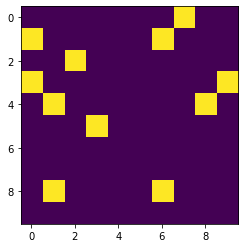

Done !!


In [12]:
grid = create_grid(cols, rows)
grid = fill_grids(grid, cols, rows, obstacle_ratio, obstacle_list, use_obstacle_ratio)
grid = get_neighbors(grid, cols, rows)

printGrid(grid)

open_set = []
closed_set = []
current_node = None
final_path = []
open_set.append(grid[start[0]][start[1]])
endd = grid[end[0]][end[1]]

while len(open_set) > 0:
    open_set, closed_set, current_node, final_path = start_path(open_set, closed_set, current_node, endd)
    if len(final_path) > 0:
        break

The way found!!!


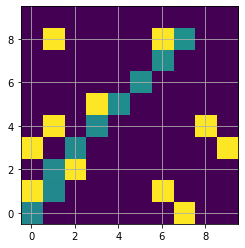

In [13]:
if len(final_path) > 0:
    print("The way found!!!")
    printGrid2(grid, final_path)
    #for i in range(len(final_path)):
        #print(final_path[i].x, final_path[i].y)
else:
    print("There is no legal way...You can decrease obstacle ration (default 20)")